# Otter populations in california

Project 1

Gail Romer and Mellie Zito

In [132]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_csv

In [133]:
filename = 'Otterdata.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M');

In [134]:
pup_total = tables.pups
otter_total = tables.total
mature_total = otter_total - pup_total;

Reads in a data table for otter pup and total otter populations. The number of pups is subtracted from the total to get the number of mature otters.

In [135]:
pofo = 0.4 #percentage of female otters
pomo = 1 - pofo 

female_pups = pup_total * pofo
male_pups = pup_total * pomo

f_mature = (otter_total - pup_total) * pofo
m_mature = (otter_total - pup_total) * pomo;

Based on at least two articles, there have been less female otters than male otters in recent years due to unknown factors. 
We break mature otters and pups into male and female and set male otters as a greater percentage of the population.

In [136]:
def plot_results(male, female, timeseries, title):
    """Plot the estimates and the model.
    
    male and female: TimeSeries of population estimates broken into male and female
    timeseries: TimeSeries of simulation results
    title: string
    """
    
    plot(female+male, '--', label='otters')
    
    
    plot(timeseries, color='gray', label='model_otters')
    
    decorate(xlabel='Year', 
             ylabel='Otter Population',
             title=title)

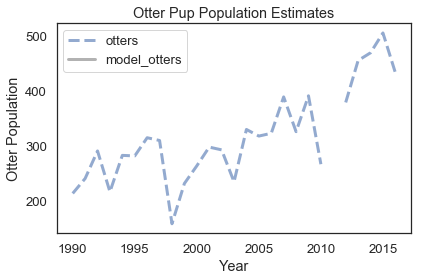

In [137]:
empty = TimeSeries()
plot_results(male_pups, female_pups,  empty, 'Otter Pup Population Estimates')

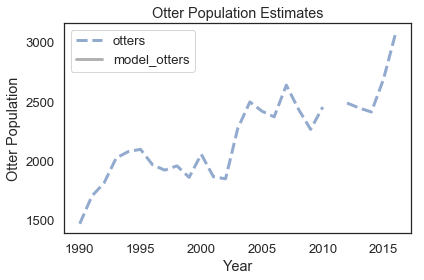

In [138]:
plot_results(f_mature, m_mature, empty, 'Otter Population Estimates')

The populations of otter pups and mature otters was plotted based on the data table

### What is the smallest number of female otters that can sustain the california otter population for the next 20 years?

Although otter populations are on the rise now, female otter populations are disproportionally affected and lower than male otter populations. If this disparity in female otters continues, it could affect birth rates, and potentially affect otter pup populations and then total otter populations. It's important to analyze what percentage of female otters dying off would cause otters to die in california, in order to maintain stable otter populations in California.

Old question: At what point of less female otters will birth rates be low enough that otter populations die out in the next 20 years in california?

In [139]:
'''State initialized with initial population numbers broken into groups'''

init_f_pups = get_first_value(female_pups)
init_m_pups = get_first_value(male_pups)
init_f_mature = get_first_value(f_mature)
init_m_mature = get_first_value(m_mature)

init_state = State(f_pups=init_f_pups, m_pups=init_m_pups, f_mature=init_f_mature, m_mature=init_m_mature)

,values
f_pups,85.6
m_pups,128.4
f_mature,586.4
m_mature,879.6


Birth rate per female is < 1 per year


             https://seaworld.org/animal-info/animal-infobooks/otters/birth-and-care-of-young                
                
Sea otter gestation range from four to nine months, with an average of six months.
Sea otters give birth throughout the year, with peaks in late May and June for Alaska otters, and March and September for California otters.
Sea otters are capable of giving birth every year, but females usually experience much longer birth intervals.
             https://www.biologicaldiversity.org/species/mammals/sea_otter/natural_history.html
                
                
Female otters reach sexual maturity at three years of age, and males follow at five to six years
Male sea otters live between 10 and 15 years, while females live slightly longer, from 15 to 20 years

In [151]:
f_birth_rate = .035
m_birth_rate = f_birth_rate 

maturation_rate = .16
f_death_rate = .0008
m_death_rate = .0008
t_0 = 1990
t_mid = 2015
t_end = 2035

'''Birth rates, maturation rate, and death rates are set and adjusted to fit data's trends
t_0, t_mid, and t_end are set based on the years the data covers and the "current year" (2015) 
to then make projections into the next 20 years
The initial state is also added to the system to then be modified for each time step
'''

system = System(f_birth_rate = f_birth_rate,
                m_birth_rate = m_birth_rate,
                maturation_rate = maturation_rate,
                f_death_rate = f_death_rate,
                m_death_rate = m_death_rate, 
                t_0 = t_0,
                t_mid = t_mid,
                t_end = t_end,
                state = init_state,
                state_2 = init_state)

,values
f_birth_rate,0.035
m_birth_rate,0.035
maturation_rate,0.16
f_death_rate,0.0008
m_death_rate,0.0008
t_0,1990
t_mid,2015
t_end,2035
state,f_pups 85.6 m_pups 128.4 f_mature ...
state_2,f_pups 85.6 m_pups 128.4 f_mature ...


In [141]:
def update_func1(state, t, system):
    '''the initial populations from state and the rates from system are used to
    update the births, pups that become mature otters, the deaths, and the new populations.
    '''
    
    f_births = system.f_birth_rate * state.f_mature #Number of new pups born is female mature otters times birth rate
    
    m_births = system.m_birth_rate * state.f_mature
    
    f_pup_deaths = system.f_death_rate * state.f_pups #Number of pup otter deaths is fixed death rate times number of pups
    
    m_pup_deaths = system.m_death_rate * state.f_pups
    
    f_pups = state.f_pups - f_pup_deaths #Pup numbers are updated by subtracting deaths
    
    m_pups = state.m_pups - m_pup_deaths
    
    f_maturlings = system.maturation_rate * state.f_pups #Number of mature otters is maturation rate times updated pup pop
    
    m_maturlings = system.maturation_rate * state.m_pups
        
    f_deaths = f_death_rate * state.f_mature #Number of otter deaths is fixed death rate times number of otters
    
    m_deaths = system.m_death_rate * state.m_mature
    
    f_otters = state.f_mature - f_deaths + f_maturlings #Number of mature otters is initial pop - deaths + newly matured otters
    
    m_otters = state.m_mature - m_deaths + m_maturlings
    
    f_pups = state.f_pups + f_births - f_maturlings #Number of pups is initial pop + births - otters that matured
    
    m_pups = state.m_pups + m_births - m_maturlings
    
    
    return State(f_pups=f_pups, m_pups=m_pups, f_mature=f_otters, m_mature=m_otters)

Update function 1 updates populations of the model for every year, based on system birth, maturation, and death rates. Update function 2 is the same as update function 1, except that it replaces the given static death rate for female otters with death_rate. death_rate is a changing value for female otter death rate from a sweepseries.

In [175]:
def update_func2(state, t, death_rate, system):
    '''the initial populations from state and the rates from system are used to
    update the births, pups that become mature otters, the deaths, and the new populations.
    '''
    
    f_births = system.f_birth_rate * state.f_mature #Number of new pups born is female mature otters times birth rate
    
    m_births = system.m_birth_rate * state.f_mature
    
    
    
    f_pup_deaths = system.f_death_rate * state.f_pups #Number of pup otter deaths is fixed death rate times number of pups
    
    m_pup_deaths = system.m_death_rate * state.f_pups
    
    
    
    f_pups = state.f_pups - f_pup_deaths #Pup numbers are updated by subtracting deaths
    
    m_pups = state.m_pups - m_pup_deaths
    
    
    f_maturlings = system.maturation_rate * f_pups #Number of mature otters is maturation rate times updated pup pop
    
    m_maturlings = system.maturation_rate * m_pups
    
    
    m_mature = state.m_mature + m_maturlings #Number of mature otters is initial mature otters and ones that matured
    
    f_mature = state.f_mature + f_maturlings
        
        
    f_deaths = death_rate * f_mature #Number of f otter deaths is death rate from sweepseries times number of f otters
    
    m_deaths = system.m_death_rate * m_mature #Number of m otter deaths is fixed death rate times number of m otters
    
    
    
    f_otters = state.f_mature - f_deaths #Number of mature otters is initial pop - deaths + newly matured otters
    
    m_otters = state.m_mature - m_deaths
    
    
    
    f_pups = state.f_pups + f_births - f_maturlings #Number of pups is initial pop + births - otters that matured 
    
    m_pups = state.m_pups + m_births - m_maturlings
    
    print(t, f_deaths, f_pups+m_pups, f_maturlings+m_maturlings, f_otters+m_otters, f_deaths+m_deaths)
    
    
    return State(f_pups=f_pups, m_pups=m_pups, f_mature=f_otters, m_mature=m_otters)

In [176]:
def run_simulation1(system, update_func):
    """Simulate the system using any update function.
    
    state: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries of mature otters and otter pups
    """
    results_mature = TimeSeries()
    results_pups = TimeSeries()
    
    state = system.state
    results_mature[system.t_0] = state.f_mature + state.m_mature
    results_pups[system.t_0] = state.f_pups + state.m_pups
    
    for t in linrange(system.t_0, system.t_mid):
        state = update_func(state, t, system)
        results_mature[t+1] = state.f_mature + state.m_mature
        results_pups[t+1] = state.f_pups + state.m_pups
    return results_mature, results_pups

Run simulation 1 uses update function to calculate new populations from the 1990 to 2015. Run simulation 2 is the same as run simulation 1, but predicts the population for 20 years past 2015, using t_0 = 1990, t_mid = 2015, and t_end = 2035. 

In [177]:
def run_simulation2(system, death_rate, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries of mature otters and otter pups
    """
    results_mature = TimeSeries()
    results_pups = TimeSeries()
    
    state = system.state
    results_mature[system.t_mid] = state.f_mature + state.m_mature
    results_pups[system.t_mid] = state.f_pups + state.m_pups
        
    for t in linrange(system.t_mid+1, system.t_end):
        state = update_func(state, t, death_rate, system)
        results_mature[t+1] = state.f_mature + state.m_mature
        results_pups[t+1] = state.f_pups + state.m_pups
    return results_mature, results_pups

2016.0 0.0 435.54678177202874 68.78366333952421 2647.1685129175166 1.3042866261628474
2017.0 0.0 440.0630346191566 69.64098554009519 2645.865807786502 1.302705131014774
2018.0 0.0 443.85874516225044 70.36152784412923 2644.5645966382417 1.301211148260584
2019.0 0.0 447.04887112915804 70.96711242031546 2643.2648058549485 1.2997907832928166
2020.0 0.0 449.730029615682 71.47607990069912 2641.9663734863893 1.2984323685594439
2021.0 0.0 451.9834231767345 71.90384482617054 2640.6692473797975 1.2971261065917157
2022.0 0.0 453.8772990874268 72.26336247653077 2639.373383609547 1.2958637702504083
2023.0 0.0 455.4690162519521 72.56552122269778 2638.078745158528 1.294638451019085
2024.0 0.0 456.8067823560292 72.81947228314594 2636.785300810885 1.2934443476430335
2025.0 0.0 457.9311138722215 73.03290687103075 2635.493024222238 1.292276588646964
2026.0 0.0 458.8760631342103 73.21228912523421 2634.2018931389366 1.2911310833011165
2027.0 0.0 459.67024964190716 73.36305187952618 2632.911888742461 1.2900

2020.0 -0.34388486632747295 227.16087370578921 43.48414155248223 1564.1697553362812 0.9433597495072261
2021.0 -2.36084035868123 189.54950746849735 36.32126873254416 1565.2476846459913 -1.077929309710243
2022.0 -2.4999481912985355 158.11714128443384 30.307527504423483 1566.4685220561655 -1.2208374101741517
2023.0 -2.219503902586498 131.88554570376704 25.2817532744177 1567.412258267658 -0.9437362114926058
2024.0 -1.883982849226467 110.00353299103247 21.08753567966651 1568.0234317000206 -0.6111734323627658
2025.0 -1.578301152935753 91.75215696886028 17.58877778854999 1568.331559564136 -0.3081278641150982
2026.0 -1.3169471956744354 76.52951288876353 14.670526927180052 1568.380700346942 -0.04914078280599665
2027.0 -1.0975237030223226 63.833037840857926 12.236544198686119 1568.2125595623777 0.16814078456407033
2028.0 -0.9143135126471691 53.243459177284045 10.206474473565958 1567.8631625800492 0.34939698232840954
2029.0 -0.7615977506487981 44.41107702735792 8.513279905803504 1567.362846805775

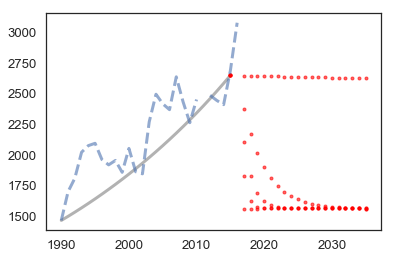

In [178]:
'''Results from run simulation 1 were used to fit the model to the data for the population between 1990 and 2015. 
Run simulation 2 is then used to create multiple models for the sweep of female otter death rates.
'''

results_mature1 = run_simulation1(system, update_func1)[0]; #Model results for 1990-2015 mature
results_pups1 = run_simulation1(system, update_func1)[1]; #Model results for 1990-2015 pups

mature_2015 = get_last_value(results_mature1) #Gets final value of results_mature1, to initialize the prediction model
pups_2015 = get_last_value(results_pups1) #Gets final value of results_pups1, to initialize the prediction model


state2 = State(f_pups = pofo * pups_2015, m_pups = pomo * pups_2015, f_mature = pofo * mature_2015, m_mature = pomo * mature_2015)

system_2 = System(f_birth_rate = f_birth_rate,
                m_birth_rate = m_birth_rate,
                maturation_rate = maturation_rate,
                f_death_rate = f_death_rate,
                m_death_rate = m_death_rate, 
                t_0 = t_0,
                t_mid = t_mid,
                t_end = t_end,
                state = state2)


plot(results_mature1, color='gray', label = 'otters')

death_rate_array = linspace(0, 1, 5) # Array for death rate sweep

sweep_pups = SweepSeries() # Array to hold swept pup data
sweep_mature = SweepSeries() # Array to hold swept mature data

for death_rate in death_rate_array: # Sweeping death rate
    results_mature = run_simulation2(system_2, death_rate, update_func2)[0];
    results_pups = run_simulation2(system_2, death_rate, update_func2)[1];

    sweep_pups = results_pups
    sweep_mature = results_mature
    
    plot(sweep_mature, ".", color = 'red', label = 'model predicted otters')
    

plot(f_mature+m_mature, "--", label='og otters')

#print(sweep_mature) #issue is mature starts increasing at some point

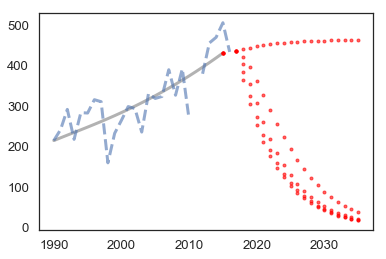

In [174]:
plot(results_pups1, color='gray', label = 'otters')

for death_rate in death_rate_array: # Sweeping death rate
    results_mature = run_simulation2(system_2, death_rate, update_func2)[0];
    results_pups = run_simulation2(system_2, death_rate, update_func2)[1];

    sweep_pups = results_pups
    sweep_mature = results_mature
    
    plot(sweep_pups, ".", color = 'red', label = 'model predicted otters')
    
plot(female_pups+male_pups, "--", label='og otters')